In [1]:
import numpy as np
import KNN
def normalise(Xin):
        return (Xin-np.mean(Xin,axis=0))/np.std(Xin,axis=0)    # NORMALISING FEATURES

data=np.genfromtxt('corners.txt',delimiter=' ')
np.random.shuffle(data); # Since data given is sorted
Y=data[:,-1]
X=data[:,:-1]
print("The labels are : "+str(np.unique(Y)))  
sz=X.shape[0]
X=normalise(X)   #normalising X
# separation of training set and test set
test_sz=sz//4  
tr_sz=sz-test_sz   
train=KNN.KNN()
train.set(X[:tr_sz-1,:],Y[:tr_sz-1],5)
test=KNN.KNN()
test.set(X[tr_sz:,:],Y[tr_sz:])
print("Accuracy on test set:  "+str(train.accuracy(test))+"%")

The labels are : [0. 1. 2. 3.]
Accuracy on test set:  100.0%


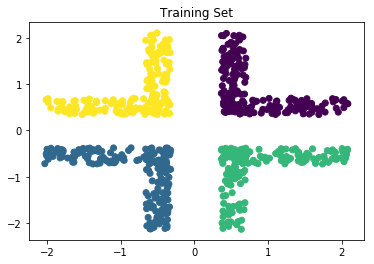

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:tr_sz-1,0],X[:tr_sz-1,1],c=Y[:tr_sz-1])
plt.title('Training  Set')
plt.show()

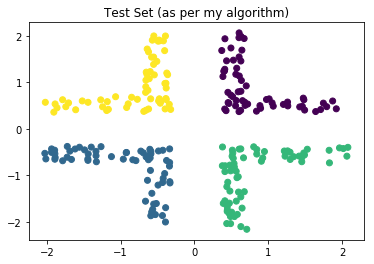

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[tr_sz:,0],X[tr_sz:,1],c=train.predict(X[tr_sz:,:]))
plt.title('Test Set (as per my algorithm)')
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X[:tr_sz-1,:],Y[:tr_sz-1])
y_pred = classifier.predict(X[tr_sz:,:])
acc=(sum(y_pred==Y[tr_sz:])/test_sz)*100
print("Accuracy on test set (by sklearn) :  "+str(acc)+"%")

Accuracy on test set (by sklearn) :  100.0%


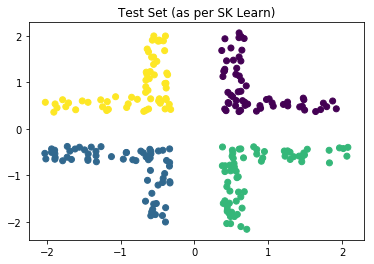

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[tr_sz:,0],X[tr_sz:,1],c=y_pred)
plt.title('Test Set (as per SK Learn)')
plt.show()